#### Graphical exploration hypthese 2: The year the building was constructed has an influence on the selling price.


##### Getting data

In [148]:
# definitions
with open("0_definitions.py") as file:
    exec(file.read())

In [ ]:
df_eda = pd.read_csv("eda4.csv",)
df_eda = df_eda.drop(df_eda.columns[0], axis=1)
df_eda.head() 

### Some extra variables for EDA

#### Difference of house construction/renovation and selling

In [150]:
#### changing data format and building time between house being sold and constructed

In [ ]:
df_eda.info() 
df_eda["date_sold"] = pd.to_datetime(df_eda["date_sold"])
df_eda["yr_sold"]=df_eda["date_sold"].dt.year
# Difference
df_eda["sold_build_difference"]=(df_eda["yr_sold"]-df_eda["yr_built"]) 

## Checking for correlation between year sold year constructed and their difference 

In [ ]:
new_column_names = {
    'yr_sold': 'Year house being sold',
    'yr_built': 'Year house being built',
    'sold_build_difference': 'Diff. time sold and constructed ',
    'price': 'price'
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

In [ ]:
df_eda.info()

In [ ]:
# Number of rows before filtering
rows_before = len(df_eda)
df_eda = df_eda[df_eda['yr_renovated'] == 0]
# Number of rows after filtering
rows_after = len(df_eda)
rows_dropped = rows_before - rows_after 
rows_dropped 
 

In [ ]:
new_column_names = {
    'yr_sold': 'Year house being sold',
    'yr_built': 'Year house being built',
    'sold_build_difference': 'Diff. time sold and constructed ',
    'price': 'Price'
}

# Rename columns in the DataFrame
df_eda.rename(columns=new_column_names, inplace=True)

# Define the list of columns for correlation
num_question = list(new_column_names.values())  # Use the new column names

# Plotting the heatmap
plt.figure(figsize=(10, 8), dpi=100)
heatmap = sns.heatmap(
    data=df_eda[num_question].corr(),  # Compute correlation matrix for specified columns
    cmap='coolwarm',                  # Color map
    linecolor='white',                # Color of lines that separate cells
    linewidth=1,                      # Width of lines that separate cells
    annot=True,                       # Annotate cells with correlation coefficients
    vmin=-1,                          # Minimum value of the color scale
    vmax=1,                           # Maximum value of the color scale
    fmt='.2f'                         # Format annotations to 2 decimal places
)

# Adding labels and title
plt.title('Correlation Heatmap of Housing Features', fontsize=16)  # Title with larger font size
plt.xlabel('Features', fontsize=14)            # X-axis label with larger font size
plt.ylabel('Features', fontsize=14)            # Y-axis label with larger font size

In [ ]:
df_eda['Year house being built'].describe()

In [ ]:
### Check of linearity 
# Define bins and labels
bins = [1900, 1930, 1960, 1990, 2020]
labels = ['Between. 1900-1930', '1931-1960', '1961-1990', '1900-2015']
# Apply pd.cut to bin the data
df_eda['Year of counstruction'] = pd.cut(df_eda['Year house being built'], bins=bins, labels=labels)
# Display the DataFrame with the new binned column
df_eda.head()

In [ ]:
plt.figure(figsize=(10, 8), dpi=100)
sns.boxplot(
    x='Year of counstruction',  # Binned categories
    y='Price',                # Variable to plot
    data=df_eda,              # Data source
    palette='coolwarm'        # Color palette for the boxplot
)

# Adding labels and title
plt.title('Price Distribution by construction', fontsize=16)  # Title with larger font size
plt.xlabel('Year house being built', fontsize=14)              # X-axis label
plt.ylabel('Price in 100000', fontsize=14)                                       # Y-axis label

plt.ylim(0, 10) 
plt.show()  # Display the boxplot

### Plotting for price and living area by year being build

In [ ]:
df_eda.info()

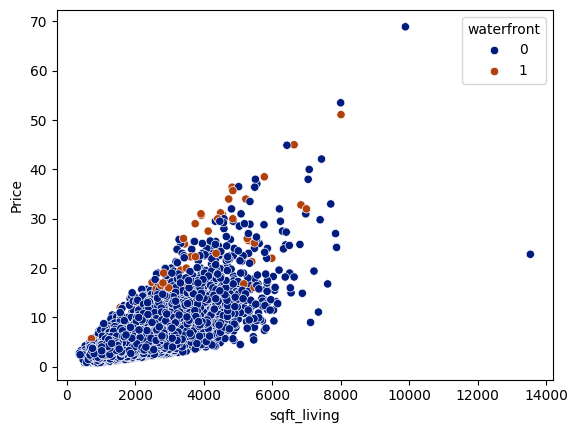

In [169]:

sns.scatterplot(data=df_eda, x='sqft_living', y='Price', 
                    hue='waterfront', palette='dark');

#### Saving data for next steps

In [ ]:
df_eda.to_csv("eda5.csv")
df_eda.head()